### HW03: Practice with SVM, kNN, gradient descent, feature engineering

Kara Conrad, 9082326472

### Hello Students:

- Start by downloading HW03.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW03.ipynb to Canvas's HW03.ipynb assignment
  - HW03.html to Canvas's HW03.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## 1. Visualize classifier decision boundaries.

## 1a. Complete the function in the next cell that plots a classifier's decision boundary.
Or, rather, it plots a classifier's decisions over an area, revealing the boundary.

Hint: My solution used 10 lines:
- Make linspaces of grid_resolution points in xlim and grid_resolution points in ylim.
  e.g. For xlim=(-1, 1), ylim=(0, 2) and grid_resolution=3, make the linspace
  (-1, 0, 1) of x coordinates and the linspace (0, 1, 2) of y coordinates.
- Use np.tile() to repeat the x grid points grid_resolution times
  (e.g. (-1, 0, 1, -1, 0, 1, -1, 0, 1)) and np.repeat() to repeat each of the y grid
  points grid_resolution times (e.g. (0, 0, 0, 1, 1, 1, 2, 2, 2)).
- Use np.stack() to combine the x grid points and y grid points into a 2D array of
  size grid_resolution$^2$ x 2. (e.g.
  [[-1, 0],
   [0, 0],
   [1, 0],
   [-1, 1],
   [0, 1],
   [1, 1],
   [-1, 2],
   [0, 2],
   [1, 2]]
  )
- Use pd.DataFrame(), setting its `columns` parameter to `clf.feature_names_in_`, to get a DataFrame.
- Make a dictionary keyed by -1 and 1 with values 'pink' and 'lightskyblue'.
- Use clf.predict() on the 2D array of points to get predicted y values.
- For each y in {-1, 1}, use plt.plot() to plot those points in your 2D array
  with that predicted y value in the color specified by your dictionary.

In [2]:
def plot_decision_boundary(clf, xlim, ylim, grid_resolution):
    x_vals = np.linspace(xlim[0], xlim[1], grid_resolution)
    y_vals = np.linspace(ylim[0], ylim[1], grid_resolution)
    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    stacked_grid = np.stack((x_grid.ravel(), y_grid.ravel()), axis=1)
    df = pd.DataFrame(data=stacked_grid, columns=clf.feature_names_in_)
    colors = {-1: 'pink', 1: 'lightskyblue'}
    predictions = clf.predict(df)
    for y_val in [-1, 1]:
        points = stacked_grid[predictions == y_val]
        plt.plot(points[:, 0], points[:, 1], '.', color=colors[y_val])
    #plt.show()

### Visualize the decision boundary for an SVM.
Here I have provided test code for your function to visualize the decision boundary for the SVM
under the header "Now try 2D toy data" inhttps://pages.stat.wisc.edu/~jgillett/451/burkov/01/01separatingHyperplane.html.

Recall: That SVM's decision boundary was $y = -x + \frac{1}{2}$, so your function should make a plot with lightskyblue above that line and pink below that line. Then my code adds the data points in blue and red.

There is nothing for you to do in this step, provided you implemented the required function above.



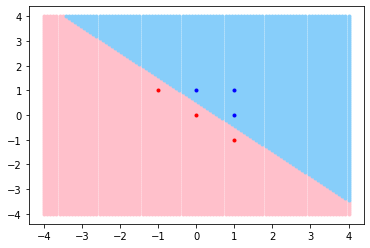

In [3]:
data_string = """
x0, x1,  y
 0,  0, -1
-1,  1, -1
 1, -1, -1
 0,  1,  1
 1,  1,  1
 1,  0,  1
"""
df = pd.read_csv(StringIO(data_string), sep='\s*,\s+', engine='python')
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(df[['x0', 'x1']], df['y'])

# Call student's function.
plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

### 1b. Visualize the decision boundary for a decision tree.
- Make a decision tree classifier on the same df used above.
  (Use criterion='entropy', max_depth=None, random_state=0.)
- Use print(export_text()) to print a text version of your tree.
- Copy the last few lines of the cell above to make the plot.
- Study the tree and plot until you understand how the plot represents the decisions in the tree.

|--- feature_1 <= -0.50
|   |--- class: -1
|--- feature_1 >  -0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_0 <= -0.50
|   |   |   |--- class: -1
|   |   |--- feature_0 >  -0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: -1
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- class: 1



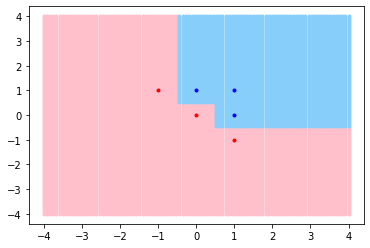

In [4]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(df[['x0', 'x1']], df['y'])
print(export_text(clf))

plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

### 1c. Visualize the decision boundary for kNN with $k=3$.
- Make a kNN classifier on the same df used above. (Use n_neighbors=3 and metric='euclidean'.)
- Copy the plotting code again.

(Experiment with $k=1$ and $k=2$ to see how the decision boundary varies with $k$ before setting $k=3$.)

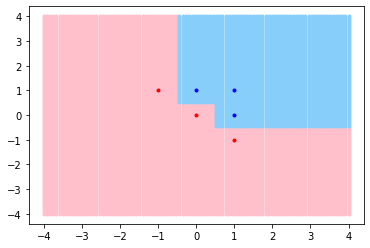

In [5]:
clf = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf.fit(df[['x0', 'x1']], df['y'])

plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

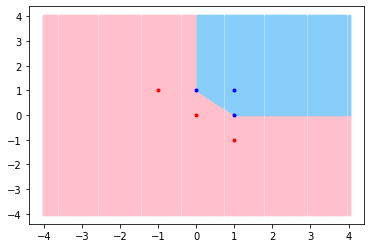

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
clf.fit(df[['x0', 'x1']], df['y'])

plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

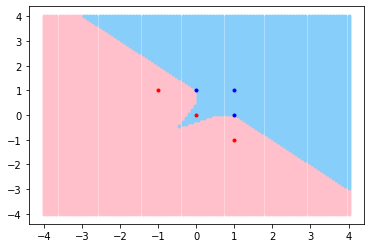

In [7]:
clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf.fit(df[['x0', 'x1']], df['y'])

plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

### 1d. Visualize the decision boundary for an SVM with a nonlinear boundary.
Use the example under the header "Nonlinear boundary: use kernel trick" in https://pages.stat.wisc.edu/~jgillett/451/burkov/03/03SVM.html.
- Read the data from http://www.stat.wisc.edu/~jgillett/451/data/circles.csv.
  This ".csv" file has y in {0, 1}, so change the 0 values to -1.
- Fit an SVM with kernel='rbf', C=1, gamma=1/2.
- Copy the last few lines of my plotting code, above, again (revising the axis limits) to make the boundary plot.

(Experiment with $\gamma = 2$, $\gamma = 10$, and $\gamma = 30$ to see how the decision boundary varies with gamma before setting gamma to 1/2.)

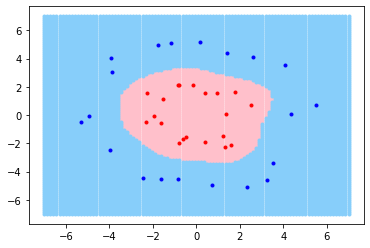

In [8]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/circles.csv')
df['y'] = df['y'].replace(0, -1)

clf = svm.SVC(kernel='rbf', C=1, gamma=1/2)
clf.fit(df[['x0', 'x1']], df['y'])

plot_decision_boundary(clf=clf, xlim=(-7, 7), ylim=(-7, 7), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

## 2. Run gradient descent by hand.
Run gradient descent with $\alpha = 0.1$ to minimize $z = f(x, y)
= (x + 1)^2 + (y + 2)^2$. Start at (0, 0) and find the next two points
on the descent path.

Hint: The minimum is at (-1, -2), so your answer should be approaching this point.

z' = 2(x+1) + 2(y+2) 

pt.1
plug (0,0) in x' = (2, 4) 
multiply by -alpha (0.1) = (-.2, -.4)
(0,0) + (-.2, -.4)= (-.2, -.4)

pt.2
plug (-.2, -.4) in x' = (1.6, 3.2) 
multiply by -alpha (0.1) = (-.16, -.32)
(-.2, -.4) + (-.16, -.32) = (-.36, -.72)

## 3. Practice feature engineering
by exploring the fact that rescaling may be necessary for kNN but not for a decision tree.

### 3a. Read and plot a toy concentric ellipses data set.

- Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv](http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv) into a DataFrame.
- Display the first five rows.
- Plot the data.
  - Put x0 on the $x$ axis and x1 on the $y$ axis.
  - Plot points with these colors:
    - $y=0$: red
    - $y=1$: blue
  - Use $x$ and $y$ axis limits of $(-6, 6)$.
  - Include a legend.

      x0     x1  y
0 -1.937 -0.006  0
1 -1.622 -0.057  0
2 -0.791 -0.200  0
3 -0.614 -0.171  0
4 -0.490 -0.154  0


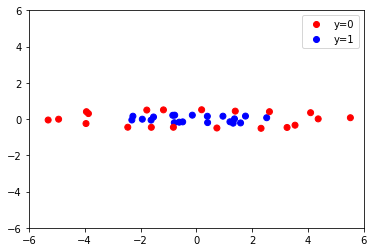

In [9]:
df = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv")
print(df.head())

plt.scatter(df['x0'], df['x1'], c=df['y'], cmap='bwr')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.legend(handles=[plt.plot([],[],color="red", marker="o", linestyle="")[0],
                    plt.plot([],[],color="blue", marker="o", linestyle="")[0]],
           labels=["y=0", "y=1"])
plt.show()

### 3b. Train a $k$NN classifier and report its accuracy.
- Use $k = 3$ and the (default) euclidean metric.
- Report the accuracy on the training data by writing a line like `Training accuracy is 0.500`
  (0.500 may not be correct).

In [10]:
X = df[["x0", "x1"]]
y = df["y"]

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)

acc = knn.score(X, y)
print(f'The accuracy rate is {acc}.')

The accuracy rate is 0.725.


### 3c. Now rescale the features using standardization; plot, train, and report accuracy again.
- Fit the scaler to the training features.
- Transform the training features.
- Plot the rescaled data.
- Train kNN again and report its accuracy as before. (Notice that rescaling helped.)

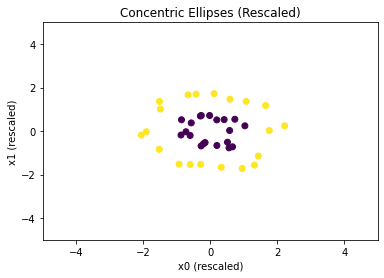

The accuracy rate is 1.0.


In [11]:
X = df[["x0", "x1"]]
y = df["y"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("x0 (rescaled)")
plt.ylabel("x1 (rescaled)")
plt.title("Concentric Ellipses (Rescaled)")
plt.show()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

accuracy = knn.score(X_scaled, y)
print(f'The accuracy rate is {accuracy}.')

### 3d. Train a decision tree classifier on the original (unscaled) data and report its accuracy.
- Train on the training data.
- Report the accuracy as before.

In [12]:
clf = DecisionTreeClassifier()
clf.fit(df[['x0', 'x1']], df['y'])

accuracy = clf.score(X, y)
print(f'The accuracy rate is {accuracy}.')

The accuracy rate is 1.0.


### 3e. Why is feature scaling unnecessary for an ID3 decision tree? Answer in a markdown cell.

Feature scaling does not change the rank ordering of the features in terms of relevance for classification, which is what matters for the ID3 algorithm. Scaling the features before training an ID3 decision tree is not necessary and will not improve the accuracy of the model.